# **Projekt Maschinelles Lernen**

Autoren:
- Alexander Czaja (czal1011)
- Jonathan Haller (hajo1038)

## Trainingsdaten laden

In [1]:
import pandas as pd, sklearn, numpy as np
print("Pandas Version:", pd.__version__, "\nSklearn Version:", sklearn.__version__, "\nNumpy Version:", np.__version__)

pd.options.mode.chained_assignment = None # Einige False-Positive-Warnungen werden unterdrückt

Pandas Version: 1.4.1 
Sklearn Version: 1.0.2 
Numpy Version: 1.21.5


In [2]:
df = pd.read_csv('train.csv', sep=';')  # Trennzeichen (;) muss angegeben werden durch den Parameter sep
df.head()

,transactionId,basket,customerType,totalAmount,returnLabel
0,9534310106,"[4, 3, 4]",new,252.0,1
1,7202594767,"[4, 2, 0, 2, 5]",existing,70.0,0
2,2737331698,[5],existing,84.0,0
3,4868011733,"[1, 4, 2, 4]",existing,116.0,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",existing,378.0,0


In [3]:
print("Anzahl Zeilen: " + str(len(df)))

Anzahl Zeilen: 22400


## Exploratory Data Analysis

### Histogramme

Histogramm von `customerType`

<AxesSubplot:>

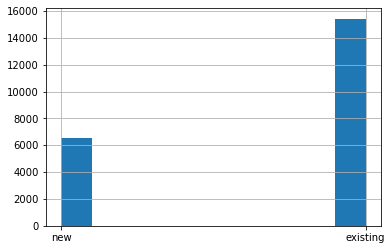

In [4]:
df['customerType'].hist()

Histogramm von `totalAmount`

<AxesSubplot:>

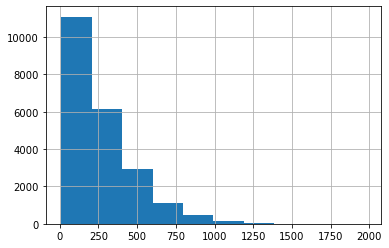

In [5]:
df['totalAmount'].hist()

Verteilung von `ReturnLabel` über alle Daten

<AxesSubplot:>

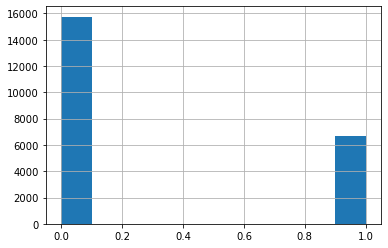

In [6]:
df['returnLabel'].hist()

Verteilung von `returnLabel` in Abhängigkeit zu allen Ausprägungen von `customerType`

array([<AxesSubplot:title={'center':'existing'}>,
       <AxesSubplot:title={'center':'new'}>], dtype=object)

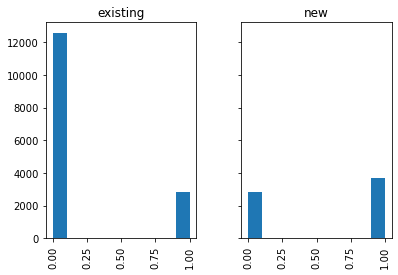

In [7]:
df.hist(column="returnLabel", by="customerType", sharey=True)

Boxplot für `totalAmount` in Abhängigkeit von `returnLabel`

<AxesSubplot:title={'center':'totalAmount'}, xlabel='returnLabel'>

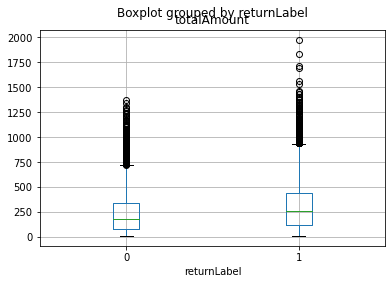

In [8]:
df.boxplot(by='returnLabel', column='totalAmount')

Displot für `totalAmount` in Abhängigkeit von `returnLabel`

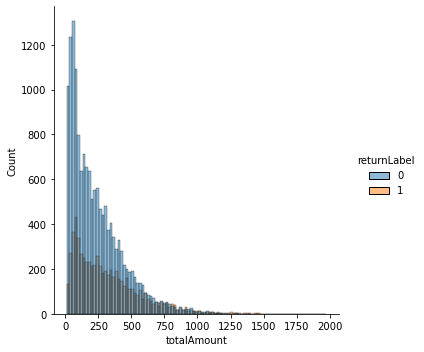

In [9]:
import seaborn as sns
sns.displot(df, x='totalAmount', hue='returnLabel')

# Bearbeitung der Trainingsdaten

## Null-Werte in den Trainingsdaten

In [10]:
df.isna().sum()

transactionId      0
basket             0
customerType     442
totalAmount      477
returnLabel        0
dtype: int64

Auffüllen der Null-Werte in der Spalte `totalAmount` und Entfernen der restlichen Zeilen mit Null-Werten

In [11]:
avg_amount = df['totalAmount'].mean()
df['totalAmount'] = df['totalAmount'].fillna(avg_amount)
df = df.dropna()
print(df.isna().sum())
print("Durchschnittlicher Gesamtpreis: " + str(avg_amount) + "\nAnzahl Zeilen: " + str(len(df)))

transactionId    0
basket           0
customerType     0
totalAmount      0
returnLabel      0
dtype: int64
Durchschnittlicher Gesamtpreis: 259.05601423162886
Anzahl Zeilen: 21958


One-Hot Encoding des kategorischen Feature `customerType`

In [12]:
df = pd.get_dummies(df, columns=['customerType'])
df.head()

,transactionId,basket,totalAmount,returnLabel,customerType_existing,customerType_new
0,9534310106,"[4, 3, 4]",252.0,1,0,1
1,7202594767,"[4, 2, 0, 2, 5]",70.0,0,1,0
2,2737331698,[5],84.0,0,1,0
3,4868011733,"[1, 4, 2, 4]",116.0,0,1,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",378.0,0,1,0


Transformation von `basket`

Kategorien von `basket`:
- Wie oft kommt jede Kategorie im `basket` vor?
- Anzahl Bücher im `basket`?

Anzahl Bücher im `basket` (`basket_size`):

In [13]:
df.head()

,transactionId,basket,totalAmount,returnLabel,customerType_existing,customerType_new
0,9534310106,"[4, 3, 4]",252.0,1,0,1
1,7202594767,"[4, 2, 0, 2, 5]",70.0,0,1,0
2,2737331698,[5],84.0,0,1,0
3,4868011733,"[1, 4, 2, 4]",116.0,0,1,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",378.0,0,1,0


Wie oft kommt eine Kategorie im `basket` vor?

In [14]:
df['basket_0'] = df['basket'].map(lambda x: x.count('0'))
df['basket_1'] = df['basket'].map(lambda x: x.count('1'))
df['basket_2'] = df['basket'].map(lambda x: x.count('2'))
df['basket_3'] = df['basket'].map(lambda x: x.count('3'))
df['basket_4'] = df['basket'].map(lambda x: x.count('4'))
df['basket_5'] = df['basket'].map(lambda x: x.count('5'))
df.head()

,transactionId,basket,totalAmount,returnLabel,customerType_existing,customerType_new,basket_0,basket_1,basket_2,basket_3,basket_4,basket_5
0,9534310106,"[4, 3, 4]",252.0,1,0,1,0,0,0,1,2,0
1,7202594767,"[4, 2, 0, 2, 5]",70.0,0,1,0,1,0,2,0,1,1
2,2737331698,[5],84.0,0,1,0,0,0,0,0,0,1
3,4868011733,"[1, 4, 2, 4]",116.0,0,1,0,0,1,1,0,2,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",378.0,0,1,0,1,0,3,2,0,1


**Entfernen des Labels und vom Basket**

In [15]:
df_label = df['returnLabel']
df = df.drop(columns=['basket', 'returnLabel'])
df.head()

,transactionId,totalAmount,customerType_existing,customerType_new,basket_0,basket_1,basket_2,basket_3,basket_4,basket_5
0,9534310106,252.0,0,1,0,0,0,1,2,0
1,7202594767,70.0,1,0,1,0,2,0,1,1
2,2737331698,84.0,1,0,0,0,0,0,0,1
3,4868011733,116.0,1,0,0,1,1,0,2,0
4,7622406570,378.0,1,0,1,0,3,2,0,1


Skalieren des Trainingsdatensatzes mit einem `StandardScaler`

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df)
scaled_values = scaler.transform(df)
df_scaled = pd.DataFrame(scaled_values, index=df.index, columns=df.columns)
df_scaled.head()

,transactionId,totalAmount,customerType_existing,customerType_new,basket_0,basket_1,basket_2,basket_3,basket_4,basket_5
0,1.557757,-0.033626,-1.536751,1.536751,-0.771646,-0.765848,-0.775648,0.073528,0.632575,-0.644999
1,0.658563,-0.879083,0.650723,-0.650723,0.385401,-0.765848,1.512019,-0.880689,-0.123677,0.525101
2,-1.063403,-0.814048,0.650723,-0.650723,-0.771646,-0.765848,-0.775648,-0.880689,-0.879928,0.525101
3,-0.241736,-0.665396,0.650723,-0.650723,-0.771646,0.393111,0.368185,-0.880689,0.632575,-0.644999
4,0.820458,0.551690,0.650723,-0.650723,0.385401,-0.765848,2.655853,1.027745,-0.879928,0.525101


## Testdatensatz

Laden des Testdatensatzes

In [17]:
df_test = pd.read_csv('test.csv', sep=';')
print("Anzahl Zeilen: " + str(len(df_test)))
df_test.head()

Anzahl Zeilen: 9600


,transactionId,basket,customerType,totalAmount,returnLabel
0,4132523932,"[4, 3, 4, 3, 2, 3]",existing,366.0,1
1,8998574539,"[3, 4, 4, 3, 5]",existing,85.0,0
2,9346688547,"[1, 1, 2, 2, 4, 4, 3, 1, 1, 0, 3]",existing,275.0,0
3,4533897707,"[3, 2, 2, 1, 5, 1, 1, 0]",existing,528.0,0
4,3334800500,"[4, 2, 3, 5, 2, 5, 1]",existing,287.0,0


Null-Werte im Testdatensatz

In [18]:
df_test.isna().sum()

transactionId      0
basket             0
customerType     203
totalAmount      175
returnLabel        0
dtype: int64

Auffüllen der Null-Werte in `totalAmount` und Entfernen des Rests (`customerType`)

In [19]:
avg_amount = df_test['totalAmount'].mean()
df_test['totalAmount'] = df_test['totalAmount'].fillna(avg_amount)
df_test = df_test.dropna()
print(df_test.isna().sum())
print("Durchschnittlicher Gesamtpreis: " + str(avg_amount) + "\nAnzahl Zeilen: " + str(len(df_test)))

transactionId    0
basket           0
customerType     0
totalAmount      0
returnLabel      0
dtype: int64
Durchschnittlicher Gesamtpreis: 263.1954376657825
Anzahl Zeilen: 9397


Transformation des Testdatensatzes analog Trainingsdatensatz (One-Hot-Encoding von `customerType` & Basket-Features)

In [20]:
df_test = pd.get_dummies(df_test, columns=['customerType'])

df_test['basket_0'] = df_test['basket'].map(lambda x: x.count('0'))
df_test['basket_1'] = df_test['basket'].map(lambda x: x.count('1'))
df_test['basket_2'] = df_test['basket'].map(lambda x: x.count('2'))
df_test['basket_3'] = df_test['basket'].map(lambda x: x.count('3'))
df_test['basket_4'] = df_test['basket'].map(lambda x: x.count('4'))
df_test['basket_5'] = df_test['basket'].map(lambda x: x.count('5'))
df_test.head()

,transactionId,basket,totalAmount,returnLabel,customerType_existing,customerType_new,basket_0,basket_1,basket_2,basket_3,basket_4,basket_5
0,4132523932,"[4, 3, 4, 3, 2, 3]",366.0,1,1,0,0,0,1,3,2,0
1,8998574539,"[3, 4, 4, 3, 5]",85.0,0,1,0,0,0,0,2,2,1
2,9346688547,"[1, 1, 2, 2, 4, 4, 3, 1, 1, 0, 3]",275.0,0,1,0,1,4,2,2,2,0
3,4533897707,"[3, 2, 2, 1, 5, 1, 1, 0]",528.0,0,1,0,1,3,2,1,0,1
4,3334800500,"[4, 2, 3, 5, 2, 5, 1]",287.0,0,1,0,0,1,2,1,1,2


Aufteilen des Trainingsdatensatzes in Label und restliche Features

In [21]:
df_test_label = df_test['returnLabel']
df_test = df_test.drop(columns=['basket', 'returnLabel'])
df_test.head()

,transactionId,totalAmount,customerType_existing,customerType_new,basket_0,basket_1,basket_2,basket_3,basket_4,basket_5
0,4132523932,366.0,1,0,0,0,1,3,2,0
1,8998574539,85.0,1,0,0,0,0,2,2,1
2,9346688547,275.0,1,0,1,4,2,2,2,0
3,4533897707,528.0,1,0,1,3,2,1,0,1
4,3334800500,287.0,1,0,0,1,2,1,1,2


Skalieren des Testdatensatzes

In [22]:
scaled_values_test = scaler.transform(df_test)
df_test_scaled = pd.DataFrame(scaled_values_test, index=df_test.index, columns=df_test.columns)
df_test_scaled.head()

,transactionId,totalAmount,customerType_existing,customerType_new,basket_0,basket_1,basket_2,basket_3,basket_4,basket_5
0,-0.525367,0.495945,0.650723,-0.650723,-0.771646,-0.765848,0.368185,1.981962,0.632575,-0.644999
1,1.351158,-0.809402,0.650723,-0.650723,-0.771646,-0.765848,-0.775648,1.027745,0.632575,0.525101
2,1.485403,0.073217,0.650723,-0.650723,0.385401,3.869989,1.512019,1.027745,0.632575,-0.644999
3,-0.370583,1.248494,0.650723,-0.650723,0.385401,2.711030,1.512019,0.073528,-0.879928,0.525101
4,-0.832998,0.128961,0.650723,-0.650723,-0.771646,0.393111,1.512019,0.073528,-0.123677,1.695202


# Trainieren der Modelle

## Modell 1: Logistische Regression

In [23]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, recall_score, precision_score
from matplotlib import pyplot

C = [0.1, 1, 4, 5, 6, 10, 30, 100]

model = LogisticRegressionCV(Cs=C, penalty='elasticnet', l1_ratios=[0,1], solver='saga', max_iter=400, random_state=0)
model.fit(df_scaled, df_label)
print('Bestes C:', int(model.C_[0]),
"\nBeste Penalty:", 'L1' if model.l1_ratio_[0] == 1 else 'L2')

Bestes C: 30 
Beste Penalty: L2


Pyplot über die **Feature Importance** der Logistischen Regression

transactionId Score: 0.011615692269670186
totalAmount Score: 0.9128062348075161
customerType_existing Score: -0.38509971467922044
customerType_new Score: 0.38509971467922044
basket_0 Score: -0.7567447614586439
basket_1 Score: -0.7513916497763605
basket_2 Score: -0.770538653631014
basket_3 Score: 0.21937287934895153
basket_4 Score: 1.007969373419227
basket_5 Score: -8.673318399638406


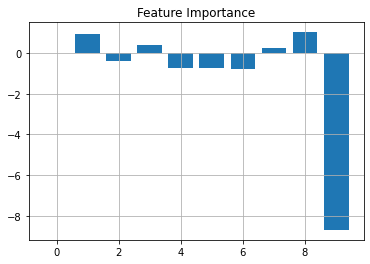

In [24]:
importance = model.coef_[0]
for i,j in enumerate(importance):
    print(f'{df.columns[i]} Score: {j}')

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title('Feature Importance')
pyplot.grid(True)
pyplot.show()

Vorhersagen der logistischen Regression

In [25]:
print("Länge der Testdaten:", len(df_test_scaled), "(Features) |", len(df_test_label), "(Label)")

Länge der Testdaten: 9397 (Features) | 9397 (Label)


In [26]:
predictions = model.predict(df_test_scaled)
stats_lr = {}
stats_lr['acc'] = accuracy_score(df_test_label, predictions)
stats_lr['prec'] = precision_score(df_test_label, predictions)
stats_lr['rec'] = recall_score(df_test_label, predictions)

print("Accuracy:", stats_lr['acc'],
"\nPrecision:", stats_lr['prec'],
"\nRecall:", stats_lr['rec'])

Accuracy: 0.873257422581675 
Precision: 0.8176100628930818 
Recall: 0.7410046312789454


Falsch klassifizierte Datenpunkte

In [27]:
wrong_indices = {'lr': [], 'rf': [], 'gbt': []}
for i in range(len(df_test_label)):
    if df_test_label.iloc[i] != predictions[i]:
        wrong_indices['lr'].append(i)
len(wrong_indices['lr'])

1191

Accuracy auf den Trainingsdaten

In [28]:
predictions = model.predict(df_scaled)
stats_lr['acc_train'] = accuracy_score(df_label, predictions)
print("Accuracy:", stats_lr['acc_train'])

Accuracy: 0.8795427634575098


# 2. Modell: Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

candidates = {'n_estimators': [60, 80, 100, 120, 140], 'max_depth': [2, 4, 6]}
model = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=candidates, n_jobs=-1)
model.fit(df_scaled, df_label)

GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6],
                         'n_estimators': [60, 80, 100, 120, 140]})

Beste Hyperparameter

In [30]:
print("Bester Wert für n_estimators:", model.best_estimator_.n_estimators,
"\nBester Wert für max_depth:", model.best_estimator_.max_depth,
"\nBester Score:", model.best_score_)

Bester Wert für n_estimators: 60 
Bester Wert für max_depth: 6 
Bester Score: 0.8696146364956636


Vorhersagen mit dem Random Forest

In [31]:
predictions = model.predict(df_test_scaled)
stats_rf = {}
stats_rf['acc'] = accuracy_score(df_test_label, predictions)
stats_rf['prec'] = precision_score(df_test_label, predictions)
stats_rf['rec'] = recall_score(df_test_label, predictions)
print("Accuracy:", stats_rf['acc'],
"\nPrecision:", stats_rf['prec'],
"\nRecall:", stats_rf['rec'])

Accuracy: 0.8609130573587315 
Precision: 0.7927400468384075 
Recall: 0.7235482721767011


Falsch klassifizierte Datenpunkte

In [32]:
for i in range(len(df_test_label)):
    if df_test_label.iloc[i] != predictions[i]:
        wrong_indices['rf'].append(i)
len(wrong_indices['rf'])

1307

Accuracy auf den Trainingsdaten

In [33]:
predictions = model.predict(df_scaled)
stats_rf['acc_train'] = accuracy_score(df_label, predictions)
print("\nAccuracy auf den Trainingsdaten:", stats_rf['acc_train'])


Accuracy auf den Trainingsdaten: 0.8729392476546134


# 3. Gradient Boosting Tree

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
model = GridSearchCV(estimator=GradientBoostingClassifier(max_depth=2,random_state=0), n_jobs=-1, param_grid=candidates)
model.fit(df_scaled, df_label)

GridSearchCV(estimator=GradientBoostingClassifier(max_depth=2, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6],
                         'n_estimators': [60, 80, 100, 120, 140]})

Beste Hyperparameter

In [35]:
print("Bester Wert für n_estimators:", model.best_estimator_.n_estimators,
"\nBester Wert für max_depth:", model.best_estimator_.max_depth,
"\nBester Score:", model.best_score_)

Bester Wert für n_estimators: 140 
Bester Wert für max_depth: 2 
Bester Score: 0.8793150959965719


Vorhersagen mit dem Gradient Boosting Tree

In [36]:
predictions = model.predict(df_test_scaled)
stats_gbt = {}
stats_gbt['acc'] = accuracy_score(df_test_label, predictions)
stats_gbt['prec'] = precision_score(df_test_label, predictions)
stats_gbt['rec'] = recall_score(df_test_label, predictions)
print("Accuracy:", stats_gbt['acc'],
"\nPrecision:", stats_gbt['prec'],
"\nRecall:", stats_gbt['rec'])

Accuracy: 0.8727253378737895 
Precision: 0.8075601374570447 
Recall: 0.75347345920912


Falsch klassifizierte Datenpunkte

In [37]:
for i in range(len(df_test_label)):
    if df_test_label.iloc[i] != predictions[i]:
        wrong_indices['gbt'].append(i)
len(wrong_indices['gbt'])

1196

Accuracy auf den Trainingsdaten

In [38]:
predictions = model.predict(df_scaled)
stats_gbt['acc_train'] = accuracy_score(df_label, predictions)
print("\nAccuracy auf den Trainingsdaten:", stats_gbt['acc_train'])


Accuracy auf den Trainingsdaten: 0.8819564623371892


Zusammenführen der Statistiken

In [39]:
stats = {'lr': stats_lr, 'rf': stats_rf, 'gbt': stats_gbt}

## Vergleich Accuracy auf Testdaten und auf Trainingsdaten

Logistische Regression

Accuracy auf den Trainingsdaten: 0.8795427634575098 
Accuracy auf den Testdaten: 0.873257422581675


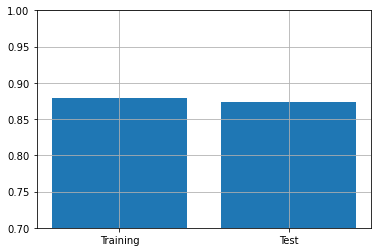

In [40]:
print('Accuracy auf den Trainingsdaten:', stats['lr']['acc_train'],
'\nAccuracy auf den Testdaten:', stats['lr']['acc'])
pyplot.bar([0,1], [stats['lr']['acc_train'], stats['lr']['acc']])
pyplot.grid(True)
pyplot.ylim(0.7, 1.0)
pyplot.xticks([0,1], ['Training', 'Test'])
pyplot.show()

Random Forest

Accuracy auf den Trainingsdaten: 0.8729392476546134 
Accuracy auf den Testdaten: 0.8609130573587315


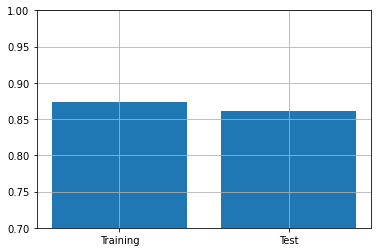

In [41]:
print('Accuracy auf den Trainingsdaten:', stats['rf']['acc_train'],
'\nAccuracy auf den Testdaten:', stats['rf']['acc'])
pyplot.bar([0,1], [stats['rf']['acc_train'], stats['rf']['acc']])
pyplot.grid(True)
pyplot.ylim(0.7, 1.0)
pyplot.xticks([0,1], ['Training', 'Test'])
pyplot.show()

Gradient Boosting Tree

Accuracy auf den Trainingsdaten: 0.8819564623371892 
Accuracy auf den Testdaten: 0.8727253378737895


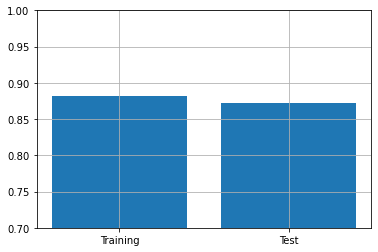

In [42]:
print('Accuracy auf den Trainingsdaten:', stats['gbt']['acc_train'],
'\nAccuracy auf den Testdaten:', stats['gbt']['acc'])
pyplot.bar([0,1], [stats['gbt']['acc_train'], stats['gbt']['acc']])
pyplot.grid(True)
pyplot.ylim(0.7, 1.0)
pyplot.xticks([0,1], ['Training', 'Test'])
pyplot.show()

**Man kann sehen, dass bei keinem der Modelle ein besonders ausgeprägtes Over- oder Underfitting vorliegt. Bei allen Modellen ist aber die Accuracy bei den Trainingsdaten leicht höher als bei den Testdaten.**

Von den einzelnen Modellen falsch klassifizierte Datenpunkte

In [43]:
wrong_guesses = {'lr': set(wrong_indices['lr']), 'rf': set(wrong_indices['rf']), 'gbt': set(wrong_indices['gbt'])}
common_set = wrong_guesses['lr'] & wrong_guesses['rf'] & wrong_guesses['gbt']

# Statistiken

Accuracy, Precision und Recall

In [44]:
print("Logistische Regression:",
'Accuracy: \t\t\t' + str(stats['lr']['acc']),
'Precision: \t\t\t' + str(stats['lr']['prec']),
'Recall: \t\t\t' + str(stats['lr']['rec']),
'Accuracy auf Trainingsdaten: \t' + str(stats['lr']['acc_train']),
"", "Random Forest:",
'Accuracy: \t\t\t' + str(stats['rf']['acc']),
'Precision: \t\t\t' + str(stats['rf']['prec']),
'Recall: \t\t\t' + str(stats['rf']['rec']),
'Accuracy auf Trainingsdaten: \t' + str(stats['rf']['acc_train']),
"", "Gradient Boosting Tree:",
'Accuracy: \t\t\t' + str(stats['gbt']['acc']),
'Precision: \t\t\t' + str(stats['gbt']['prec']),
'Recall: \t\t\t' + str(stats['gbt']['rec']),
'Accuracy auf Trainingsdaten: \t' + str(stats['gbt']['acc_train']),
sep='\n'
)

Logistische Regression:
Accuracy: 			0.873257422581675
Precision: 			0.8176100628930818
Recall: 			0.7410046312789454
Accuracy auf Trainingsdaten: 	0.8795427634575098

Random Forest:
Accuracy: 			0.8609130573587315
Precision: 			0.7927400468384075
Recall: 			0.7235482721767011
Accuracy auf Trainingsdaten: 	0.8729392476546134

Gradient Boosting Tree:
Accuracy: 			0.8727253378737895
Precision: 			0.8075601374570447
Recall: 			0.75347345920912
Accuracy auf Trainingsdaten: 	0.8819564623371892


Falsch erkannte Datenpunkte

In [45]:
print(
"Logistische Regression: " + str(len(wrong_guesses['lr'])),
"Random Forest: \t\t" + str(len(wrong_guesses['rf'])),
"Gradient Boosting Tree: " + str(len(wrong_guesses['gbt'])),
"", "Von allen Modellen falsch erkannte Datenpunkte: " + str(len(common_set)),
sep='\n'
)

Logistische Regression: 1191
Random Forest: 		1307
Gradient Boosting Tree: 1196

Von allen Modellen falsch erkannte Datenpunkte: 933
